In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
thickness = np.array([6.8,6.9,7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8,8.1,8.2,8.3,8.4,8.5,9,9.5,10,10.5,11,11.5,12])
conductivities = np.array([265.833826,385.7487136,2604.55289,4409.948758,10921.54655,28455.23483,61253.40268,69184.21053,208193.4423,254429.239,312497.7106,318725.4784,318356.2226,335227.9939,365347.3533,371496.1423,386801.3937,403764.7059,462033.3015,509885.3664,546978.8551,572884.4221,592157.0856,608776.6351,619750.558])
cond_scaled = conductivities / 1e5

In [3]:
thickness2 = np.copy(thickness[5:11])
cond_scaled2 = np.copy(cond_scaled[5:11])
cond_scaled2_error = np.array([7179.407878,15460.19418,17462.55469,52554.50642,64180.05068,78805.19227]) / 1e5
thickness2

array([7.3, 7.4, 7.5, 7.6, 7.7, 7.8])

In [4]:
thickness_trial1 = np.array([6.5,6.8,7.3,7.4,7.5,7.6,7.7])
cond_scaled_trial1 = np.array([307584.067,55480899.26,164208285.6,197447513.4,244056040.3,282753297.9,299418813.9]) / 1e8

In [5]:
thickness_trial3 = np.array([])

<ErrorbarContainer object of 3 artists>

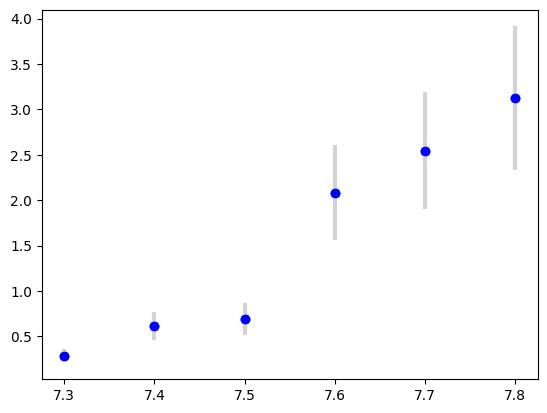

In [6]:
plt.scatter(thickness2, cond_scaled2, color='blue')
plt.errorbar(thickness2, cond_scaled2, yerr=cond_scaled2_error, fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)

In [14]:
# Fit function
def f(x,s,t_0,a):
    f_vals = np.empty(len(x))
    f_vals[x < t_0] = 0 # constant value for x < t_0
    f_vals[x >= t_0] = s * (x[x >= t_0]/t_0 - 1)**(a)

    return f_vals

popt, pcov = curve_fit(f, thickness2, cond_scaled2, p0=[10,7,1])
popt_t1, pcov_t1 = curve_fit(f, thickness_trial1, cond_scaled_trial1, p0=[10,7,1])

Text(0.5, 0, 'Thickness [nm]')

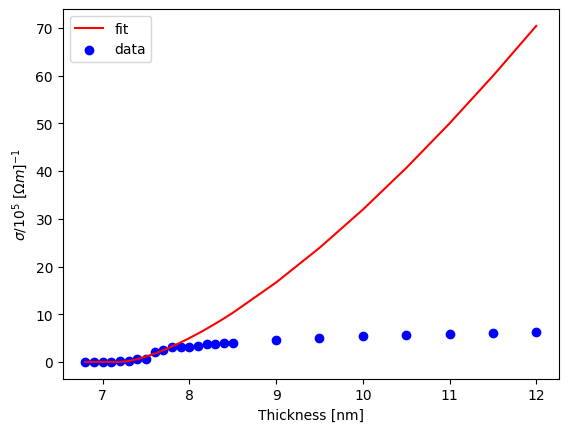

In [15]:
plt.plot(thickness, f(thickness, *popt),color='red',label='fit')
plt.scatter(thickness, cond_scaled, color='blue',label='data')
plt.legend()
plt.ylabel(r'$\sigma/10^5$ $[\Omega m]^{-1}$')
plt.xlabel('Thickness [nm]')

Text(0.5, 0, 'Thickness [nm]')

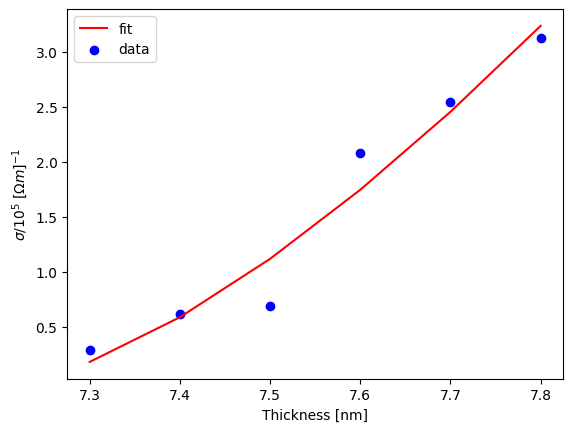

In [16]:
popt, pcov = curve_fit(f, thickness2, cond_scaled2, p0=[10,7,1])
plt.plot(thickness2, f(thickness2, *popt),color='red',label='fit')
plt.scatter(thickness2, cond_scaled2, color='blue',label='data')
plt.legend()
plt.ylabel(r'$\sigma/10^5$ $[\Omega m]^{-1}$')
plt.xlabel('Thickness [nm]')

Text(0.5, 0, 'Thickness [nm]')

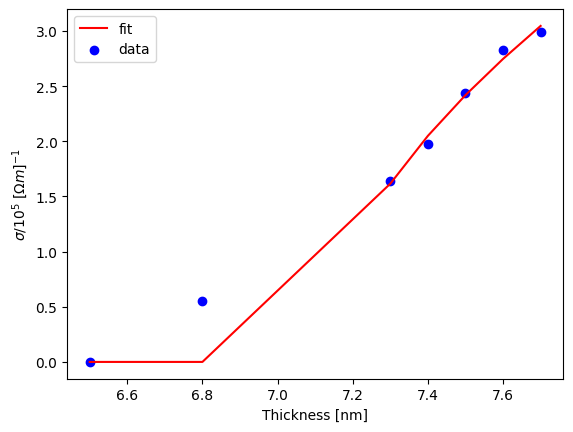

In [17]:
popt_t1, pcov_t1 = curve_fit(f, thickness_trial1, cond_scaled_trial1, p0=[10,7,1])
plt.plot(thickness_trial1, f(thickness_trial1, *popt_t1),color='red',label='fit')
plt.scatter(thickness_trial1, cond_scaled_trial1, color='blue',label='data')
plt.legend()
plt.ylabel(r'$\sigma/10^5$ $[\Omega m]^{-1}$')
plt.xlabel('Thickness [nm]')

In [18]:
alpha = popt[-1]
alpha_err = pcov[2][2]**0.5

alpha_t1 = popt_t1[-1]
alpha_t1_err = pcov_t1[2][2]**0.5

In [19]:
print(alpha, alpha_err)
print(alpha_t1, alpha_t1_err)
z_score = (alpha - 1.15) / alpha_err
print(z_score)
z_score = (alpha_t1 - 1.15) / alpha_t1_err
print(z_score)

1.4597210953011688 0.8933387616977982
0.5523225689723162 0.834637102765739
0.34670061188494855
-0.7160925737031801


In [20]:
(alpha_t1 + alpha) / 2

np.float64(1.0060218321367425)

In [22]:
sigma_tot = np.sqrt(alpha_err**2 + alpha_t1_err**2)
print(sigma_tot)

1.2225682952150128


In [169]:
np.mean([alpha, alpha_t1])

np.float64(1.0060218321367425)

[2.46983143e-05 1.67765116e-04 4.75519798e-04 9.76548074e-04
 1.69313439e-03 2.64395064e-03]


/var/folders/8g/pz1h2bxn525cwwzfygrtsxbh0000gn/T/ipykernel_14613/3185970091.py:3: RuntimeWarning: invalid value encountered in power
  return (x-1)**alpha


<ErrorbarContainer object of 3 artists>

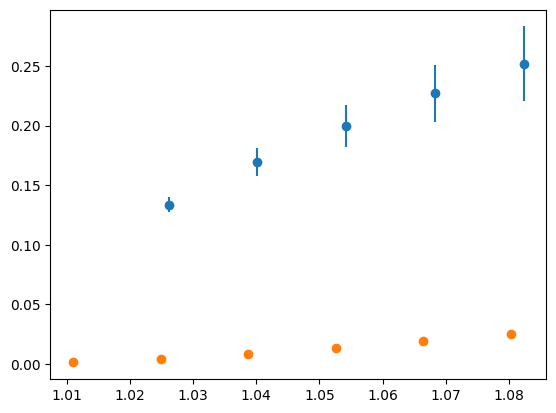

In [194]:
# Scaled plots
def scaled_f(x,alpha):
    return (x-1)**alpha

trial_1 = scaled_f(thickness_trial1/(popt_t1[1]), alpha_t1)
trial_2 = scaled_f(thickness2/(popt[1]), alpha)


trial_1_error = scaled_f(thickness_trial1/(popt_t1[1]), alpha_t1 + alpha_t1_err)
trial_1_error
trial_2_error = scaled_f(thickness2/(popt[1]), alpha + alpha_err)
print(trial_2_error)

plt.errorbar(thickness_trial1/(popt_t1[1]), trial_1, yerr=trial_1_error, fmt='o', label='Trial 1')
plt.errorbar(thickness2/(popt[1]), trial_2, yerr=trial_2_error, fmt='o', label='Trial 2')
# plt.xlabel('Thickness / t_0')
# plt.ylabel(r'$\sigma/\sigma_0$')

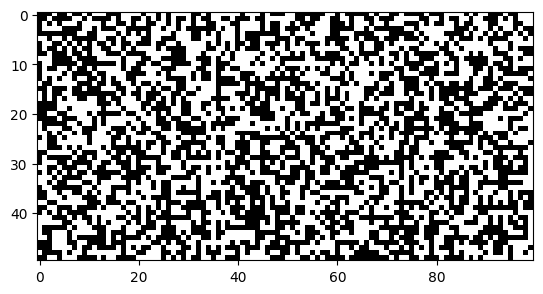

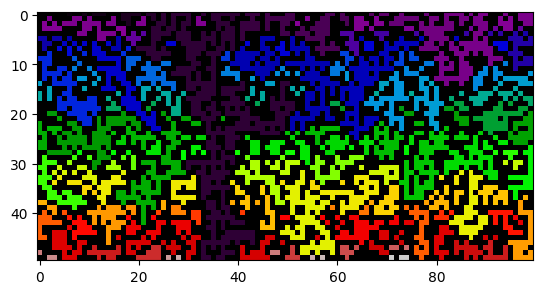

In [85]:
# Simple percolation model - testing
w=50
l=100
film = np.zeros(shape=(w,l))
while np.sum(film) / film.size < 0.5:
    x = np.random.randint(0,w)
    y = np.random.randint(0,l)
    film[x,y] = 1

plt.imshow(film, cmap='gray')
plt.show()

from scipy.ndimage import label
import scipy.stats as stats
labeled_array, num_features = label(film)
plt.imshow(labeled_array, cmap='nipy_spectral')

In [172]:
# Percolation monte carlo

def percolate(w,l):
    w = 30
    l = int(8.25*w)
    film = np.zeros(shape=(w,l)) # Start at half filling to save time
    percolated = False
    while percolated == False:
        x = np.random.randint(0,w)
        y = np.random.randint(0,l)
        film[x,y] = 1

        labeled_array, num_features = label(film)

        # Check for percolation - if any label appears on left and right edge at any point, percolation has occurred
        left_edge_labels = set(labeled_array[:,0])
        right_edge_labels = set(labeled_array[:,l-1])
        left_edge_labels.discard(0)  # Remove background
        right_edge_labels.discard(0)  # Remove background
        if len(left_edge_labels.intersection(right_edge_labels)) > 0:
            percolated = True

    filling_frac = np.sum(film) / film.size

    return filling_frac


# Monte Carlo
num_trials = 100
filling_fracs = np.empty(num_trials)
for i in range(num_trials):
    filling_fracs[i] = percolate(50,100)

In [173]:
np.unique(labeled_array)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158], dtype=int32)

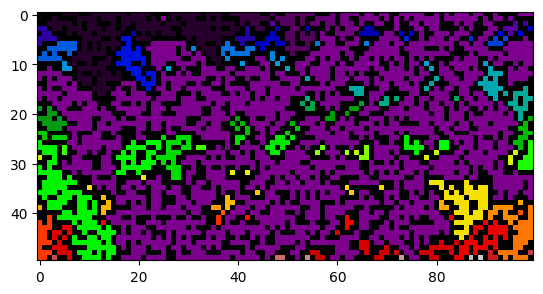

In [177]:
plt.imshow(labeled_array, cmap='nipy_spectral')

[0.6465587  0.68906883 0.63846154 0.65775978 0.65870445 0.6488529
 0.62712551 0.64912281 0.61983806 0.66248313 0.63778677 0.6611336
 0.648583   0.62712551 0.65195682 0.65937922 0.63319838 0.65249663
 0.69541161 0.67395412 0.63981107 0.63184885 0.65775978 0.64817814
 0.65438596 0.66653171 0.64156545 0.65006748 0.66437247 0.68448043
 0.65708502 0.66099865 0.63994602 0.66518219 0.6585695  0.6465587
 0.66545209 0.64048583 0.67624831 0.64008097 0.63751687 0.64210526
 0.66734143 0.68663968 0.65775978 0.64534413 0.64925776 0.66194332
 0.68394062 0.69190283 0.67881242 0.65276653 0.64183536 0.64318489
 0.61659919 0.69635628 0.62672065 0.6802969  0.66302294 0.66923077
 0.62887989 0.67611336 0.66369771 0.63117409 0.64278003 0.65748988
 0.66234818 0.62834008 0.64696356 0.65762483 0.69041835 0.61565452
 0.63576248 0.6757085  0.66315789 0.65006748 0.63954116 0.64278003
 0.63414305 0.62523617 0.66531714 0.62645074 0.6534413  0.67503374
 0.6268556  0.61646424 0.67192982 0.69460189 0.63792173 0.6790823

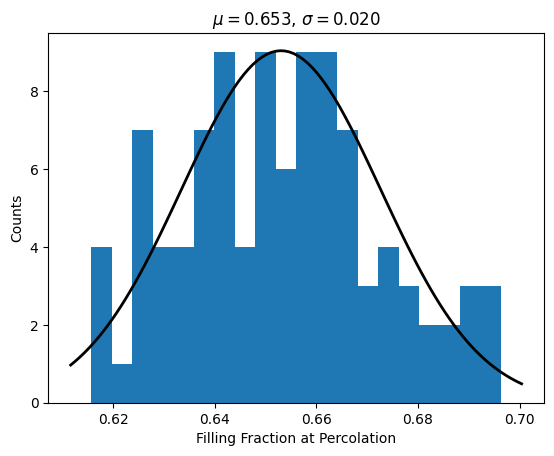

In [176]:
print(filling_fracs)
plt.hist(filling_fracs, bins=20)
mu, sigma = stats.norm.fit(filling_fracs)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p * num_trials * (xmax - xmin) / 20, 'k', linewidth=2)
plt.xlabel('Filling Fraction at Percolation')
plt.ylabel('Counts')
plt.title(r'$\mu=%.3f$, $\sigma=%.3f$' % (mu, sigma))
plt.show()


In [170]:
# Estimate sigma_0 = final conducitivty value
sigma_0 = 669074.3863
np.log(sigma_0)

np.float64(13.41365052321319)

In [173]:
(cond_scaled2 / (sigma_0/1e5)) * np.exp(-alpha)

array([0.00987959, 0.02126704, 0.0240206 , 0.07228427, 0.08833723,
       0.10849847])